In [1]:
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults/

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults


In [2]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

In [3]:
%ls

HLFV_110GeV_AdditionalTree.root    HLFV_135GeV_AdditionalTree.root
HLFV_110GeV_SelectionResults.root  HLFV_135GeV_SelectionResults.root
HLFV_115GeV_AdditionalTree.root    HLFV_140GeV_AdditionalTree.root
HLFV_115GeV_SelectionResults.root  HLFV_140GeV_SelectionResults.root
HLFV_120GeV_AdditionalTree.root    HLFV_145GeV_AdditionalTree.root
HLFV_120GeV_SelectionResults.root  HLFV_145GeV_SelectionResults.root
HLFV_125GeV_AdditionalTree.root    HZ4l_AdditionalTree.root
HLFV_125GeV_SelectionResults.root  HZ4l_SelectionResults.root
HLFV_130GeV_AdditionalTree.root    ZWW4l_AdditionalTree.root
HLFV_130GeV_SelectionResults.root  ZWW4l_SelectionResults.root


In [4]:
# This creates a Python list of strings
file_list = glob.glob('*AdditionalTree.root')

In [5]:
def load_data(file_paths, tree_name):
    """
    Loads data from multiple ROOT files into a dictionary of Akward arrays.
    """
    data = {}
    for name, path in file_paths.items():
        print(f"Loading data from {path}...")
        try:
            with uproot.open(path) as file:
                tree = file[tree_name]
                data[name] = tree.arrays()
        except Exception as e:
            print(f"Error loading {path}: {e}")
            data[name] = None
    return data



file_paths = {}
for file_name in file_list:
    key = file_name.split('_AdditionalTree.root')[0]
    file_paths[key] = file_name


raw_data = load_data(file_paths,"Selection Results")


Loading data from HLFV_130GeV_AdditionalTree.root...
Loading data from HLFV_135GeV_AdditionalTree.root...
Loading data from HLFV_110GeV_AdditionalTree.root...
Loading data from HLFV_140GeV_AdditionalTree.root...
Loading data from ZWW4l_AdditionalTree.root...
Loading data from HLFV_145GeV_AdditionalTree.root...
Loading data from HZ4l_AdditionalTree.root...
Loading data from HLFV_125GeV_AdditionalTree.root...
Loading data from HLFV_120GeV_AdditionalTree.root...
Loading data from HLFV_115GeV_AdditionalTree.root...


In [6]:
raw_data['HLFV_110GeV'].fields

['Status_00_Lepton_PT',
 'Status_01_FinalState_4Leptons',
 'Status_02_Lepton_Odd',
 'Status_03_Charge_Violation',
 'Status_04_Z_Window',
 'Status_05_NotZ_dR',
 'Status_06_NotZ_MET_dPhi',
 'Status_07_NotZ_MassThreshold',
 'NearestZ_Mass',
 'OtherPair_Mass',
 'Z_PairIndexSum',
 'NotZ_dR',
 'NotZ_dPhi',
 'NotZ_EleMET_dPhi',
 'NotZ_MuMET_dPhi']

In [7]:
raw_data.keys()

dict_keys(['HLFV_130GeV', 'HLFV_135GeV', 'HLFV_110GeV', 'HLFV_140GeV', 'ZWW4l', 'HLFV_145GeV', 'HZ4l', 'HLFV_125GeV', 'HLFV_120GeV', 'HLFV_115GeV'])

In [8]:
# Pass Final Cut Statistics
for key in raw_data.keys():
    total_events = 1000000  # Assuming each dataset has 1 million events
    passed_events = ak.sum(raw_data[key]['Status_05_NotZ_dR'])
    print(f"{key}: {passed_events} out of {total_events} events passed the final cut.")

HLFV_130GeV: 571782 out of 1000000 events passed the final cut.
HLFV_135GeV: 569267 out of 1000000 events passed the final cut.
HLFV_110GeV: 580589 out of 1000000 events passed the final cut.
HLFV_140GeV: 566225 out of 1000000 events passed the final cut.
ZWW4l: 53947 out of 1000000 events passed the final cut.
HLFV_145GeV: 563084 out of 1000000 events passed the final cut.
HZ4l: 53880 out of 1000000 events passed the final cut.
HLFV_125GeV: 573374 out of 1000000 events passed the final cut.
HLFV_120GeV: 575716 out of 1000000 events passed the final cut.
HLFV_115GeV: 578915 out of 1000000 events passed the final cut.


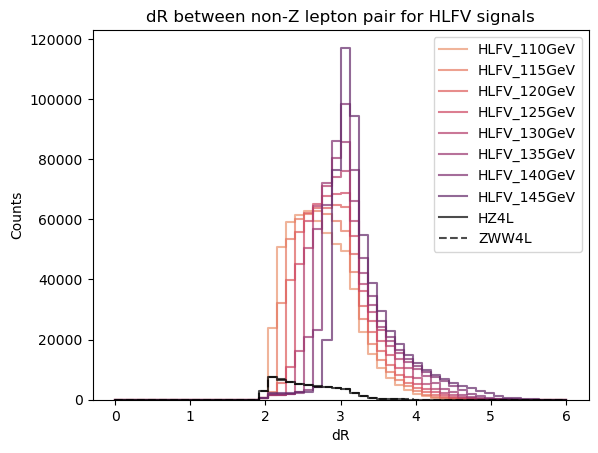

In [9]:
# plot NotZ_dR distribution for all LFV signals (layered)
plottype="NotZ_dR"
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=50, binrange=(0, 6), ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype][raw_data['HZ4l']['Status_05_NotZ_dR']==1], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=50, binrange=(0, 6), ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"dR between non-Z lepton pair for HLFV signals")
ax.set_xlabel("dR")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

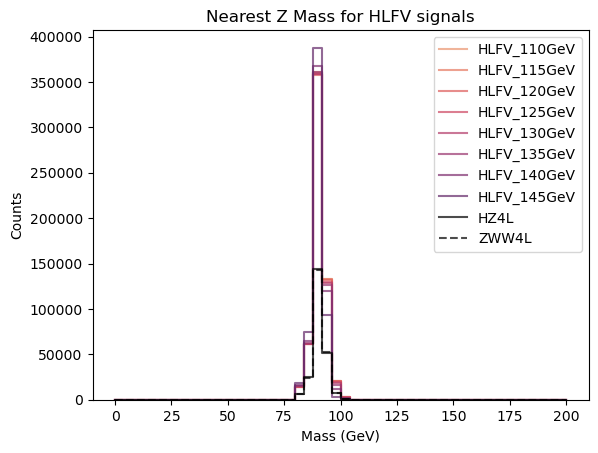

In [10]:
# plot NearestZ_Mass distribution for all LFV signals (layered)
plottype="NearestZ_Mass"
bins=50
binrange=(0, 200)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype]
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"Nearest Z Mass for HLFV signals")
ax.set_xlabel("Mass (GeV)")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

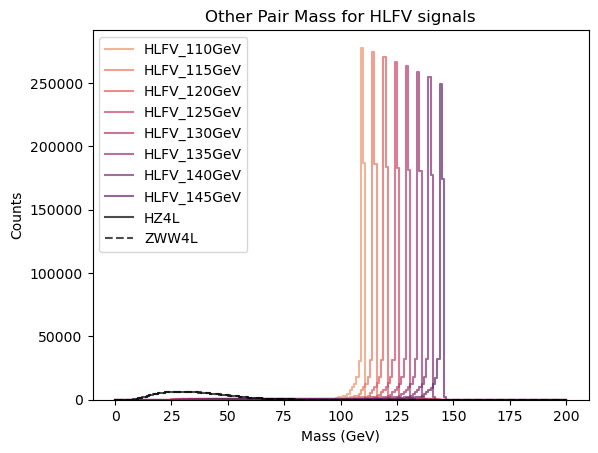

In [11]:
# plot NeareOtherPair_MassstZ_Mass distribution for all LFV signals (layered)
plottype="OtherPair_Mass"
bins=200
binrange=(0, 200)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype]
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"Other Pair Mass for HLFV signals")
ax.set_xlabel("Mass (GeV)")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

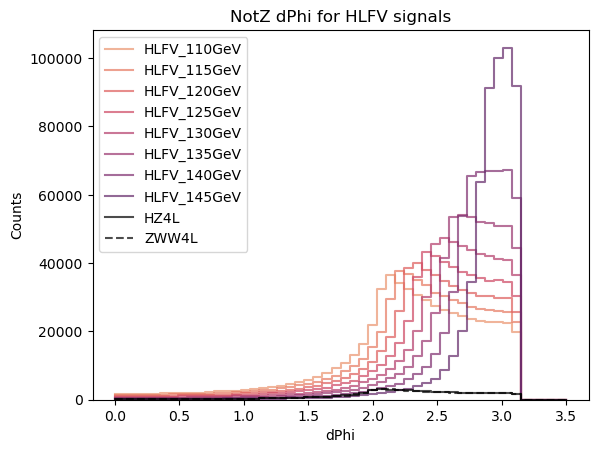

In [12]:
# plot NotZ_dPhi distribution for all LFV signals (layered)
plottype="NotZ_dPhi"
bins=50
binrange=(0, 3.5)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype][raw_data['HZ4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"NotZ dPhi for HLFV signals")
ax.set_xlabel("dPhi")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

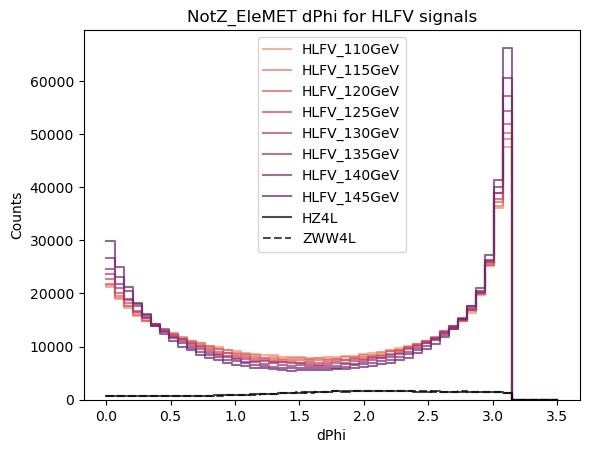

In [13]:
# plot NotZ_EleMET_dPhi distribution for all LFV signals (layered)
plottype="NotZ_EleMET_dPhi"
bins=50
binrange=(0, 3.5)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype][raw_data['HZ4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"NotZ_EleMET dPhi for HLFV signals")
ax.set_xlabel("dPhi")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

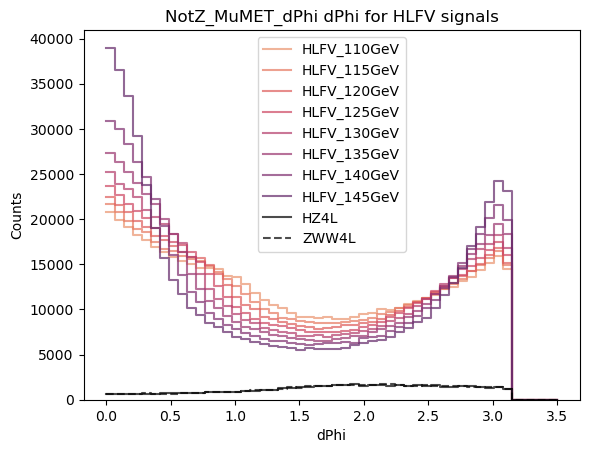

In [14]:
# plot NotZ_MuMET_dPhi distribution for all LFV signals (layered)
plottype="NotZ_MuMET_dPhi"
bins=50
binrange=(0, 3.5)
fig=plt.figure()
ax=fig.add_subplot(111)
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
colors=sns.color_palette("flare", len(signalType))
for i,signal in enumerate(signalType):
    a=raw_data[signal]
    n_arr=a[plottype][a['Status_05_NotZ_dR']==1]  # Apply final cut status
    sns.histplot(n_arr, bins=bins, binrange=binrange, ax=ax, fill=False,
                 element="step", alpha=0.7, color=colors[i],
                 stat="count", multiple="layer", label=signal)
sns.histplot(raw_data['HZ4l'][plottype][raw_data['HZ4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black',
             stat="count", multiple="layer", label="HZ4L")
sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l']['Status_05_NotZ_dR']==1], bins=bins, binrange=binrange, ax=ax, fill=False,
             element="step", alpha=0.7, color='black', linestyle='dashed',
             stat="count", multiple="layer", label="ZWW4L")
ax.set_title(f"NotZ_MuMET_dPhi dPhi for HLFV signals")
ax.set_xlabel("dPhi")
ax.set_ylabel("Counts")
ax.legend()
plt.show()

In [15]:
['Status_00_Lepton_PT',
 'Status_01_FinalState_4Leptons',
 'Status_02_Lepton_Odd',
 'Status_03_Charge_Violation',
 'Status_04_Z_Window',
 'Status_05_NotZ_dR',
 'Status_06_NotZ_MET_dPhi',
 'NearestZ_Mass',
 'OtherPair_Mass',
 'Z_PairIndexSum',
 'NotZ_dR',
 'NotZ_dPhi',
 'NotZ_EleMET_dPhi',
 'NotZ_MuMET_dPhi']

['Status_00_Lepton_PT',
 'Status_01_FinalState_4Leptons',
 'Status_02_Lepton_Odd',
 'Status_03_Charge_Violation',
 'Status_04_Z_Window',
 'Status_05_NotZ_dR',
 'Status_06_NotZ_MET_dPhi',
 'NearestZ_Mass',
 'OtherPair_Mass',
 'Z_PairIndexSum',
 'NotZ_dR',
 'NotZ_dPhi',
 'NotZ_EleMET_dPhi',
 'NotZ_MuMET_dPhi']

In [17]:
# calculate yield of 05_NotZ_dR cut
signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV","HZ4l","ZWW4l"]
for key in signalType:
    total_events = 1000000  # Assuming each dataset has 1 million events
    passed_events = ak.sum(raw_data[key]['Status_07_NotZ_MassThreshold'])
    if key not in ["HZ4l", "ZWW4l"]:
        yield_value = passed_events / total_events
        # print(f"{key}:{yield_value}")
    
    elif key == "HZ4l":
        luminosity = total_events/2.797 # N=xsec * luminosity
        yield_value =  passed_events/luminosity # scale to 1ab^-1 luminosity
        
    elif key == "ZWW4l":
        luminosity = total_events/2.691 # N=xsec * luminosity
        yield_value =  passed_events/luminosity # scale to 1ab^-1 luminosity
    print(f"{key} yield at 1ab^-1: {yield_value}")

HLFV_110GeV yield at 1ab^-1: 0.576983
HLFV_115GeV yield at 1ab^-1: 0.575509
HLFV_120GeV yield at 1ab^-1: 0.572547
HLFV_125GeV yield at 1ab^-1: 0.570358
HLFV_130GeV yield at 1ab^-1: 0.568789
HLFV_135GeV yield at 1ab^-1: 0.566312
HLFV_140GeV yield at 1ab^-1: 0.563238
HLFV_145GeV yield at 1ab^-1: 0.559844
HZ4l yield at 1ab^-1: 0.005594000000000001
ZWW4l yield at 1ab^-1: 0.005634953999999999
